# Demo - 1: Linear Regression Example in PyTorch

- **DSBA 6165 - Spring 2025 @ Archit Parnami**

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


## Step 1: Create a dataset
We create a simple dataset with one feature (X) and one target variable (y). The relationship is linear: y = 2 * X.

In [2]:

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)


## Step 2: Define the model
We create a class that inherits from nn.Module. It contains a single linear layer.

In [3]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


## Step 3: Initialize the model and loss function

We create an instance of the model, define the mean squared error loss function, and use stochastic gradient descent as the optimizer

In [4]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Step 4: Train the model
We loop over a number of epochs, performing the forward pass, computing the loss, and updating the model parameters using backpropagation and gradient descent.

In [5]:
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

## Step 5: Evaluate the model
We make predictions using the trained model and plot the results.

In [6]:
with torch.no_grad():
    y_pred = model(X)
    print(y_pred)

tensor([[2.0065],
        [4.0032],
        [5.9998],
        [7.9964]])


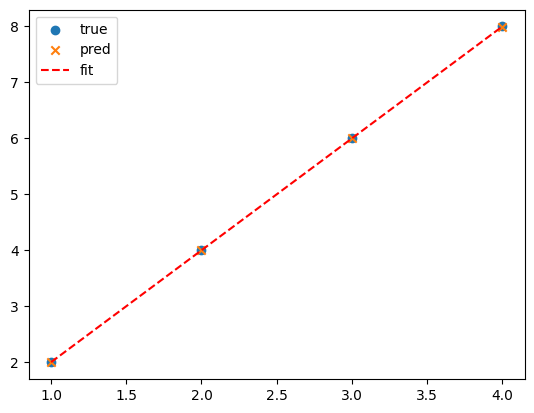

In [7]:
plt.scatter(X.numpy(), y.numpy(), label='true')
plt.scatter(X.numpy(), y_pred.numpy(), label='pred', marker='x')
plt.plot(X.numpy(), y_pred.numpy(), label='fit', linestyle='--', color='r')
_ = plt.legend()

## Inspect the parameters

In [8]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [9]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[1.9966]])
linear.bias tensor([0.0099])
